In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
DF1=pd.read_csv("/content/drive/My Drive/TrainData.csv")
Data=DF1.copy()
Data.isnull().sum()  #idebtify the null values in data set

OilQual        0
EnginePerf     0
NormMileage    0
TyreWear       0
HVACwear       0
Service        0
dtype: int64

In [ ]:
Data.isnull().sum()
missing=Data[Data.isnull().any(axis=1)]

In [ ]:
data2=Data.dropna(axis=0)
data2.describe()
data2.isnull().sum()

OilQual        0
EnginePerf     0
NormMileage    0
TyreWear       0
HVACwear       0
Service        0
dtype: int64

In [ ]:
corr=data2.corr()
print(corr)

              OilQual  EnginePerf  NormMileage  TyreWear  HVACwear
OilQual      1.000000    0.998271     0.997599  0.999045  0.997717
EnginePerf   0.998271    1.000000     0.998385  0.998228  0.998077
NormMileage  0.997599    0.998385     1.000000  0.997837  0.998400
TyreWear     0.999045    0.998228     0.997837  1.000000  0.997176
HVACwear     0.997717    0.998077     0.998400  0.997176  1.000000


<ipython-input-6-f3a054b618c9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data2.corr()


In [ ]:
age_pricesat=pd.crosstab(index= data2['OilQual'], columns=data2['EnginePerf'],margins=True, normalize= "index")
print(age_pricesat)

EnginePerf   1.891003    2.841003    2.891003    3.021003    3.461003    \
OilQual                                                                   
0.987185029    0.000000    0.000000    0.000000    0.000000    0.000000   
2.027185029    0.000000    0.000000    0.000000    0.000000    0.000000   
2.987185029    0.000000    0.000000    0.000000    0.000000    0.000000   
3.127185029    1.000000    0.000000    0.000000    0.000000    0.000000   
3.467185029    0.000000    0.000000    0.000000    0.000000    0.000000   
...                 ...         ...         ...         ...         ...   
105.7888212    0.000000    0.000000    0.000000    0.000000    0.000000   
106.1088212    0.000000    0.000000    0.000000    0.000000    0.000000   
106.3888212    0.000000    0.000000    0.000000    0.000000    0.000000   
106.4288212    0.000000    0.000000    0.000000    0.000000    0.000000   
All            0.009524    0.003175    0.015873    0.003175    0.003175   

EnginePerf   3.891003   

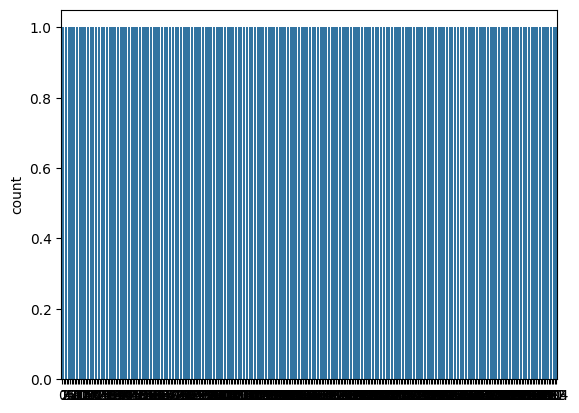

In [ ]:
plot1=sns.countplot(data2['TyreWear'])
#plot2=sns.distplot(data2['TyreWear'],bins=10, kde='False')

In [ ]:
data2['Service']=data2['Service'].map({'Yes':1,'No':0})
print(data2['Service'])
#data2.describe(include='O')

0      0
1      1
2      1
3      0
4      0
      ..
310    0
311    0
312    1
313    1
314    1
Name: Service, Length: 315, dtype: int64


In [ ]:
newdata=pd.get_dummies(data2,drop_first=True)
newdata

,OilQual,EnginePerf,NormMileage,TyreWear,HVACwear,Service
0,103.388821,103.504032,103.051485,106.172658,105.686843,0
1,26.765516,26.188265,31.259536,29.186162,31.311275,1
2,62.413282,63.681061,59.720883,64.704031,58.620518,1
3,45.533338,49.906615,48.777581,48.113851,47.952072,0
4,104.388821,103.284032,103.051485,105.822658,106.536843,0
...,...,...,...,...,...,...
310,105.168821,103.744032,103.051485,107.172658,104.856843,0
311,104.388821,105.744032,103.051485,105.782658,104.196843,0
312,63.823282,62.741061,59.720883,61.654031,62.620518,1
313,26.535516,27.418265,31.259536,27.486162,33.311275,1


In [ ]:
column_list=list(newdata.columns)
feature=list(set(column_list)-set(['Service']))
feature

['HVACwear', 'EnginePerf', 'OilQual', 'TyreWear', 'NormMileage']

In [ ]:
y=newdata['Service'].values
x=newdata[feature].values
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2,random_state=0)
Logistic=LogisticRegression()
Logistic.fit(trainx,trainy)
Logistic.coef_
Logistic.intercept_
predict=Logistic.predict(testx)
print(predict)

[0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0]


In [ ]:

confusionm=confusion_matrix(testy,predict)
print(confusionm)

[[44  3]
 [ 1 15]]


KNN NEAREST NEIGHBOURS


In [ ]:
accuracyscore=accuracy_score(testy,predict)
print(accuracyscore)
print((testy!=predict).sum())

0.9365079365079365
4


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn_classifier=KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(trainx, trainy)
kpredict=knn_classifier.predict(testx)
kpredict
confusionm=confusion_matrix(testy,kpredict)
print(confusionm)

[[47  0]
 [ 0 16]]
